In [1]:
# Core analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
%matplotlib inline
sns.set(style="whitegrid")

# Load the merged dataset with customer info
ords_prods_merged_final = pd.read_pickle('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Prepared Data/ords_prods_merged_final.pkl')

print(ords_prods_merged_final.shape)
ords_prods_merged_final.head()


(32435059, 25)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_label,busiest_day,day_type,busiest_period_of_day,gender,state,age,num_dependents,marital_status,income
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Mid-range product,Least busy day,Average days,Average orders,Female,Alabama,31,3,married,40423
1,2539329,1,prior,1,2,8,0.0,14084,2,0,...,Mid-range product,Least busy day,Average days,Average orders,Female,Alabama,31,3,married,40423
2,2539329,1,prior,1,2,8,0.0,12427,3,0,...,Low-range product,Least busy day,Average days,Average orders,Female,Alabama,31,3,married,40423
3,2539329,1,prior,1,2,8,0.0,26088,4,0,...,Low-range product,Least busy day,Average days,Average orders,Female,Alabama,31,3,married,40423
4,2539329,1,prior,1,2,8,0.0,26405,5,0,...,Low-range product,Least busy day,Average days,Average orders,Female,Alabama,31,3,married,40423


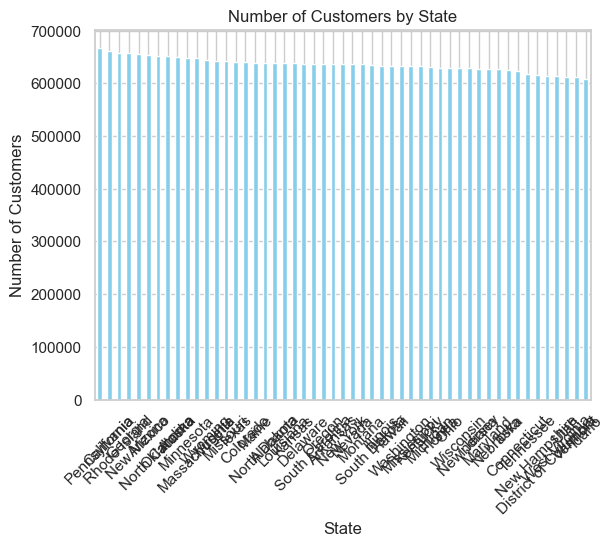

In [2]:
# Count of customers by state
state_counts = ords_prods_merged_final['state'].value_counts()

## Bar chart
state_counts.plot.bar(title='Number of Customers by State', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/customers_by_state.png')
plt.show()




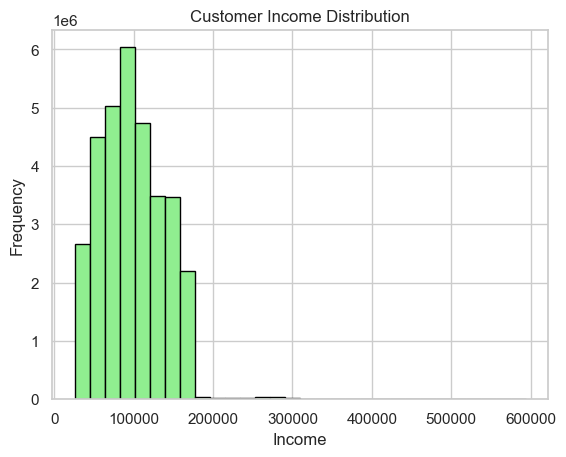

In [3]:
## Histogram
ords_prods_merged_final['income'].plot.hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Customer Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/income_distribution.png')
plt.show()


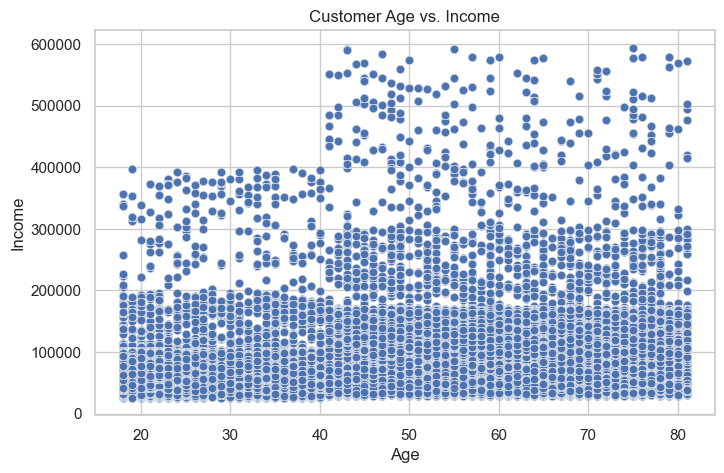

In [4]:
## Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ords_prods_merged_final, x='age', y='income', alpha=0.3)
plt.title('Customer Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/age_vs_income.png')
plt.show()


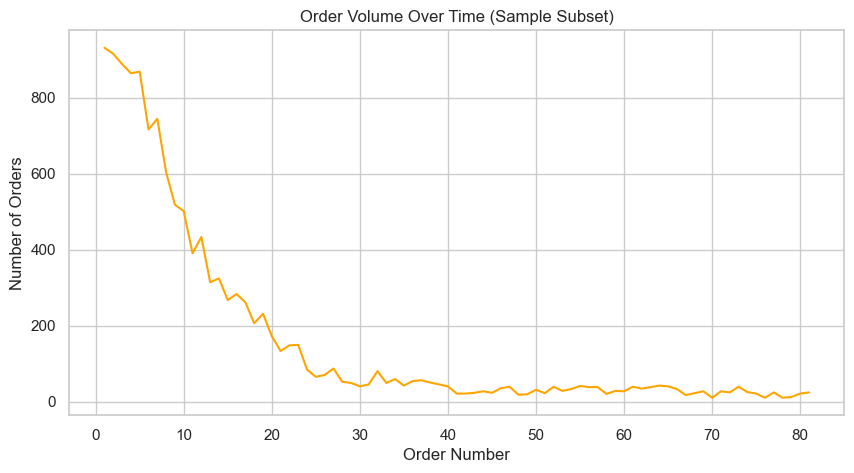

In [5]:
## Line Chart
sample_subset = ords_prods_merged_final[ords_prods_merged_final['user_id'] < 100]

# Group by order_number and counting how many orders at each point
order_trend = sample_subset.groupby('order_number').size()

# Line plot
order_trend.plot.line(figsize=(10, 5), color='orange')
plt.title('Order Volume Over Time (Sample Subset)')
plt.xlabel('Order Number')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/orderVolume_overTime.png')
plt.show()


## Required Visualizations

To explore customer behavior and spending, I created four key charts:

1. **Bar Chart** — Count of customers by state.
2. **Histogram** — Distribution of customer income levels.
3. **Scatterplot** — Relationship between age and income.
4. **Line Chart** — Sample trend of order volume over time using a subset of users.

These visualizations provide insights into regional distribution, economic demographics, and order behavior.


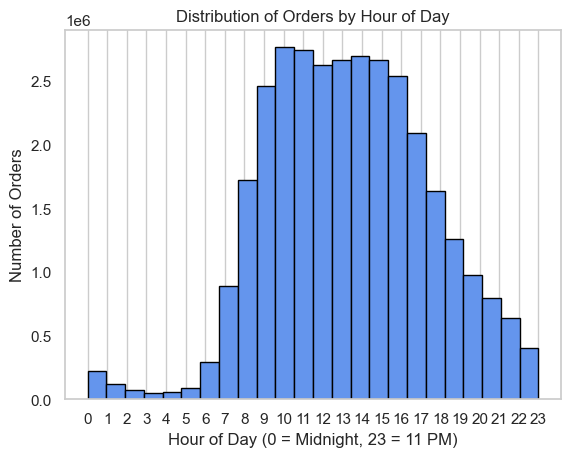

In [6]:
## Q3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. 
ords_prods_merged_final['order_hour_of_day'].plot.hist(bins=24, color='cornflowerblue', edgecolor='black')

plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/Distribution_of_Orders_by_Hour_of_Day.png')
plt.show()


### Key Observations:
- **Peak ordering times are between 9 AM and 3 PM**, with a noticeable spike around **10–11 AM**.
- **Very few orders are placed late at night or early in the morning** (before 6 AM or after 9 PM).
- This suggests that most users shop during the **daytime and early afternoon**, possibly during breaks or before evening routines.

These insights can help Instacart optimize delivery availability, app notifications, and marketing efforts to align with peak usage periods.


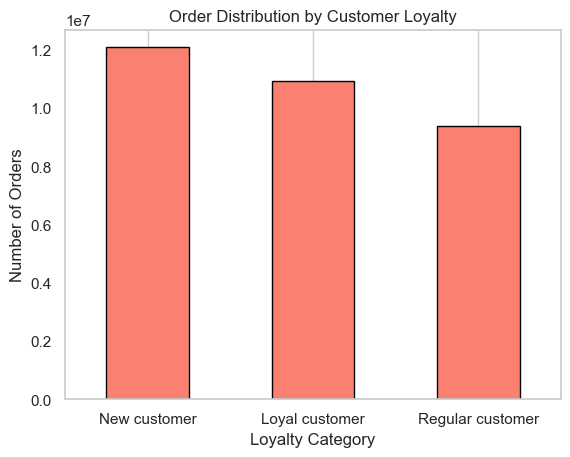

In [7]:
## Q4
ords_prods_merged_final['avg_order'] = ords_prods_merged_final.groupby('user_id')['order_number'].transform('mean')

# Create loyalty_flag column
ords_prods_merged_final.loc[ords_prods_merged_final['avg_order'] > 20, 'loyalty_flag'] = 'Loyal customer'
ords_prods_merged_final.loc[(ords_prods_merged_final['avg_order'] <= 20) & (ords_prods_merged_final['avg_order'] > 10), 'loyalty_flag'] = 'Regular customer'
ords_prods_merged_final.loc[ords_prods_merged_final['avg_order'] <= 10, 'loyalty_flag'] = 'New customer'

loyalty_counts = ords_prods_merged_final['loyalty_flag'].value_counts()

loyalty_counts.plot.bar(color='salmon', edgecolor='black')
plt.title('Order Distribution by Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/OrderDistribution_by_CustomerLoyalty.png')
plt.show()



## Order Distribution by Customer Loyalty
- **Loyal customers** account for a large portion of total orders, reflecting their frequent shopping behavior.
- **Regular customers** also contribute significantly.
- **New customers** represent fewer total orders, likely due to their lower number of transactions.

This visualization helps the marketing team understand where most order volume is coming from and where to focus retention strategies.


In [8]:
## Q5
# Groups by hour and calculates mean price
hourly_spending = ords_prods_merged_final.groupby('order_hour_of_day')['prices'].mean()

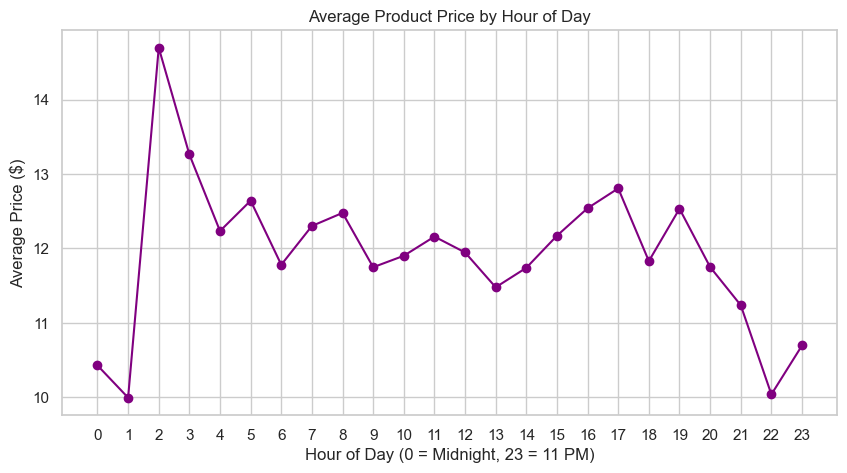

In [9]:
hourly_spending.plot.line(marker='o', color='purple', figsize=(10,5))
plt.title('Average Product Price by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Average Price ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/AverageProductPrice_by_Hour_of_Day.png')
plt.show()


## Average Expenditure by Hour of Day

### Key Observations:
- Average spending is **relatively stable** across the day.
- There may be **slight increases during mid-morning and early afternoon hours**.
- Very early or very late hours tend to show minor fluctuations, likely due to fewer data points.

This suggests customer spending habits do not vary drastically by time, but slight variations may still help target premium product promotions during peak hours.'


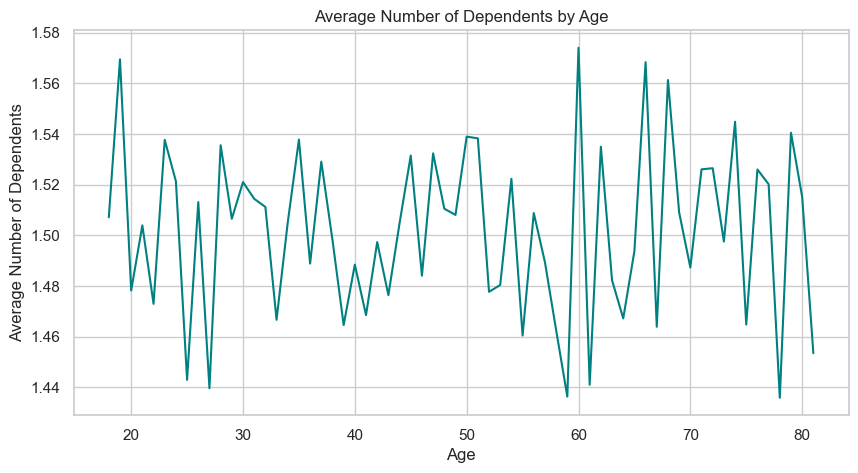

In [10]:
## Q6
age_dependents = ords_prods_merged_final.groupby('age')['num_dependents'].mean()

plt.figure(figsize=(10, 5))
age_dependents.plot.line(color='teal')
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid(True)
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/Average_Number_of_Dependents_by_Age.png')
plt.show()


## Relationship Between Age and Number of Dependents

### Key Observations:
- The number of dependents tends to **increase in early adulthood**, peaking around the **30s to early 40s**, which is consistent with typical family-building age.
- After middle age, the number of dependents **declines steadily**, likely as children grow older and leave the household.
- Younger users (under 25) and older users (over 60) generally have **fewer or no dependents**.

This insight can help tailor family-focused marketing efforts toward age groups with higher family responsibilities.


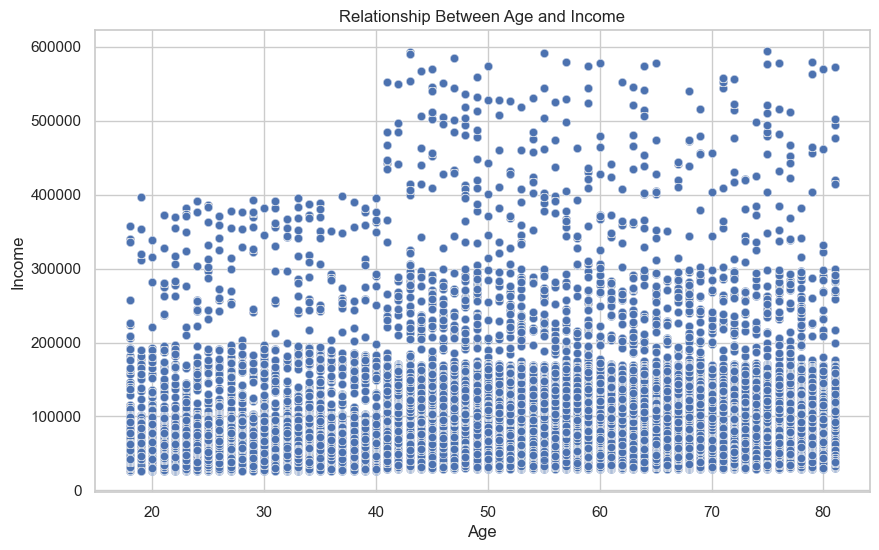

In [11]:
# Q7
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ords_prods_merged_final, x='age', y='income', alpha=0.3)
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.savefig('/Users/cem/Desktop/Data Immersion/Achievement 4_Project/Data/Visualizations/RelationshipBetweenAge_and_Income.png')
plt.show()


## Relationship Between Age and Income

This scatterplot displays the relationship between customer age and income.

### Key Observations:
- There is **no strong linear correlation** between age and income.
- Income values are **widely scattered** across all age groups.
- However, there appears to be a **higher concentration of middle-to-high earners** in the **30–50 age range**, suggesting prime earning years.
- Some younger and older users also show high incomes, likely due to outliers (e.g., early professionals or retirees with wealth).

This visualization helps the marketing team understand that **income-based targeting should not rely on age alone**. More precise targeting should involve income brackets directly.
